# SI 618 WN 2018 Homework 2: Improving an existing Jupyter notebook

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas.

### Name:  Akio Kakishima
### Uniqname: akiokaki
### People you worked with: I worked by myself

## Objectives:
* gain experience using Kaggle
* apply your knowledge of pandas to improve existing code


In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["dir", "../input"], shell=True).decode("utf-8"))
import seaborn as sns

# Any results you write to the current directory are saved as output.

In [100]:
# Set the matplotlib color cycle using a seaborn palette
sns.set_palette('Set3', 10)

# Set the plotting context parameters.
sns.set_context('talk')

# Read in the Netflix csv and set as pandas object
movie=pd.read_csv('Netflix Shows.csv',encoding='cp437') # got rid of ../input

# View the first 5 entries in the csv file
movie.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### Enhancements #1
Deal with missing values in user rating score: Replace with -1 so that it's easier to filter out
Output a basic summary of user rating score.

Do the same with "user rating size"

In [101]:
# Set all null values to -1
movie["user rating score"] = movie["user rating score"].fillna(-1)

# See basic stats on newly formatted variable
movie["user rating score"].describe()

count    1000.000000
mean       50.482000
std        42.711684
min        -1.000000
25%        -1.000000
50%        70.000000
75%        91.000000
max        99.000000
Name: user rating score, dtype: float64

In [102]:
# Set all null values to -1
movie["user rating size"] = movie["user rating size"].fillna(-1)

# See basic stats on newly formatted variable
movie["user rating size"].describe()

count    1000.000000
mean       80.783000
std         0.973066
min        80.000000
25%        80.000000
50%        80.000000
75%        82.000000
max        82.000000
Name: user rating size, dtype: float64

### Enhancements #2
What is the user rating score per person, assuming rating size is the number of people.

Create a new variable called "avg_userRating"
Run a basic summary on it.

In [105]:
# Calculate the rating score per user
movie["avg_usrRating"] = movie["user rating score"]/movie["user rating size"]

# See if the basic stats are altered
movie.describe()

# Create a new dataframe where the filter are in place
movie_filtered_var = (movie["user rating score"] > -1) & (movie["user rating size"] > -1)
movie_filtered = movie[movie_filtered_var]
movie_filtered["avg_usrRating"] = movie_filtered["user rating score"]/movie_filtered["user rating size"]
movie_filtered.describe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ratingDescription,release year,user rating score,user rating size,avg_usrRating
count,605.000000,605.000000,605.000000,605.0,605.000000
mean,73.003306,2010.325620,84.094215,80.0,1.051178
std,27.884874,9.372431,12.344371,0.0,0.154305
min,10.000000,1940.000000,55.000000,80.0,0.687500
25%,60.000000,2007.000000,75.000000,80.0,0.937500
50%,80.000000,2015.000000,88.000000,80.0,1.100000
75%,90.000000,2016.000000,95.000000,80.0,1.187500
max,124.000000,2017.000000,99.000000,80.0,1.237500


### Enhancements #3
How does the average user rating differ by categories?

Using "avg_userRating" plot a bar graph that shows the average user rating for each rating.
Draw a mean line in the bar graph.

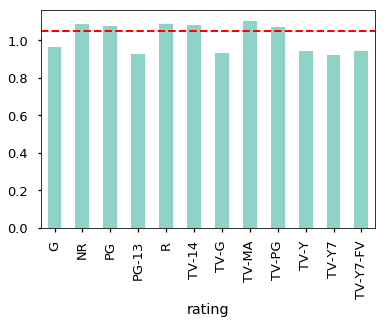

In [118]:
# Group by rating and see its average "avg_usrRating" values in a bar graph
movie_filtered.groupby('rating')['avg_usrRating'].mean().plot(kind = 'bar')

# Draw a mean line of the average user rating in dotted red line
plt.axhline(movie_filtered['avg_usrRating'].mean(), linestyle='dashed', color = 'r', linewidth=2)

### Enhancements #4
How does the average rating change over the years?

Using "avg_userRating" plot a line graph that shows the changes in average user rating for each year.
Draw a mean line in the bar graph.

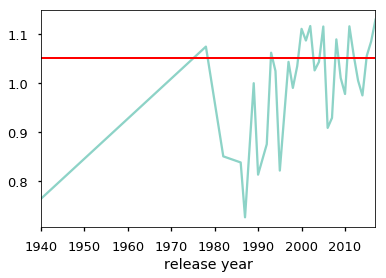

In [202]:
# Plot the average user rating changes by year in a line graph
movie_filtered.groupby('release year')['avg_usrRating'].mean().plot()

# Draw an average line
plt.axhline(movie_filtered['avg_usrRating'].mean(), color = 'r', linewidth=2)

### Enhancements #5
How different are the user ratings for each rating? 

Plot the ratings for each rating.

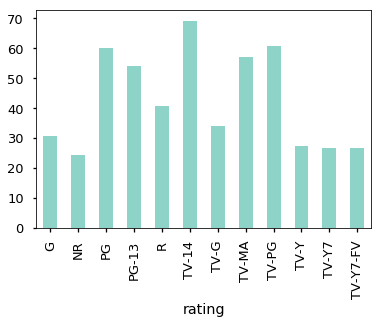

In [155]:
# Filter out the UR ratings
movie=movie.fillna(value=0,axis=1)
movie=movie[movie['rating']!='UR']

# Plot mean user rating score by TV ratings
movie.groupby('rating')['user rating score'].mean().plot(kind = 'bar')

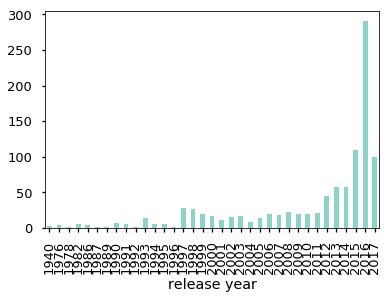

In [121]:
# Plot the number of movies that came out per year
movie.groupby(['release year']).size().plot(kind='bar')

Text(0.5,1,'Average scores of shows')

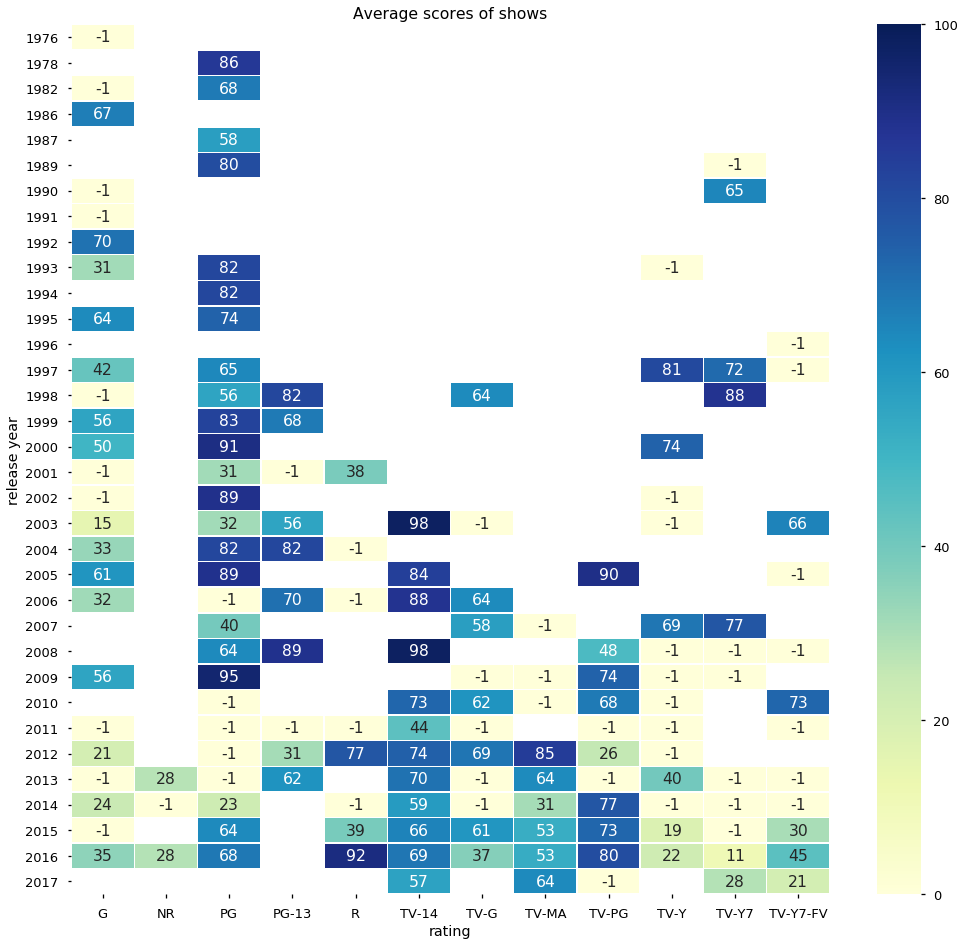

In [122]:
# Filter movie dataframe so that only release year after 1940 is selected
movie=movie[movie['release year']>1940]

# Group by ratings
score=movie.groupby('rating')['rating']

# Create a variable named score_counts that keeps track of scores
score_counts=score.count()

# Make a subset of the df movie that has the movie ratin in score_counts
movie_genre= movie[movie.rating.isin(score_counts.keys())]

# Initialize a table using score, year, and rating average
table_score = pd.pivot_table(movie_genre ,values=['user rating score'],index=['release year'],columns=['rating'],aggfunc='mean',margins=False)
table_count=pd.pivot_table(movie_genre,values=['user rating score'],index=['release year'],columns=['rating'],aggfunc='count',margins=False)

# Make the table big
plt.figure(figsize=(17,16))

# Make the table a heat map of user rating score
sns.heatmap(table_score['user rating score'],linewidths=.5,annot=True,vmin=0,vmax=100,cmap='YlGnBu')

# Add a title
plt.title('Average scores of shows')

Text(0.5,1,'Count of shows')

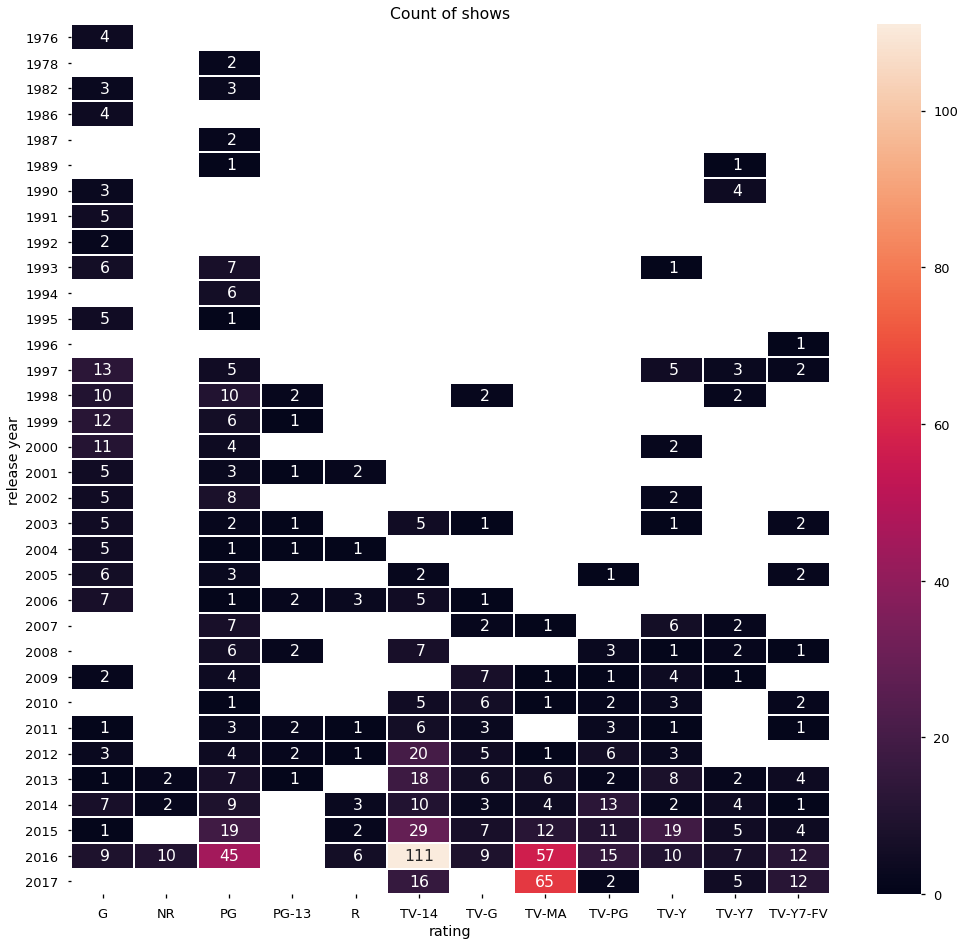

In [144]:
# Make heatmap of number of shows per year by rating
plt.figure(figsize=(17,16))
sns.heatmap(table_count['user rating score'],linewidths=1,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of shows')

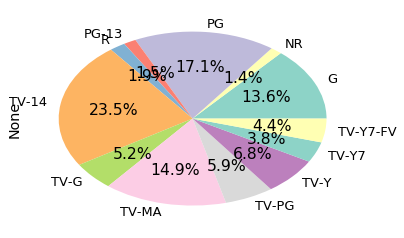

In [143]:
# Make a pie chart of percentage each rating takes up
movie.groupby(['rating']).size().plot(kind='pie',autopct='%1.1f%%')

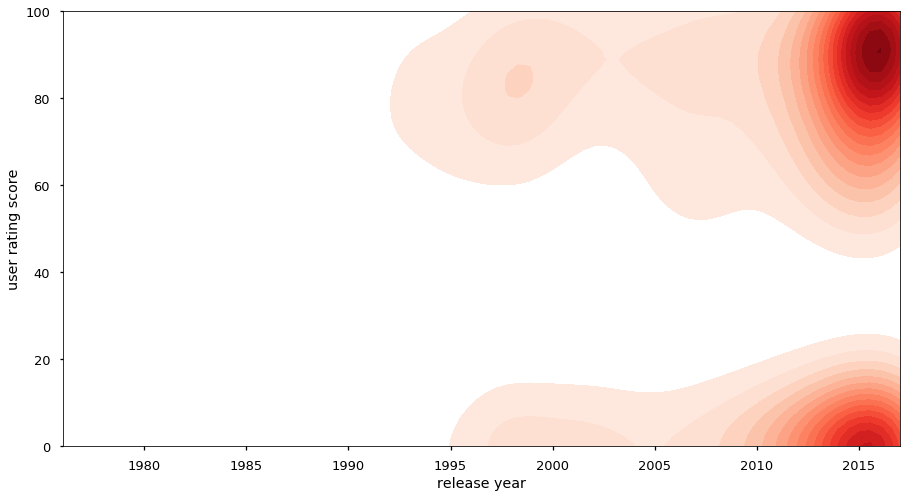

In [145]:
# Make a heatmap of year and score where darker colors represent more movies
plt.figure(figsize=(15,8))
plt.xlim(1976,2017)
plt.ylim(0,100)
sns.kdeplot(movie['release year'], movie['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

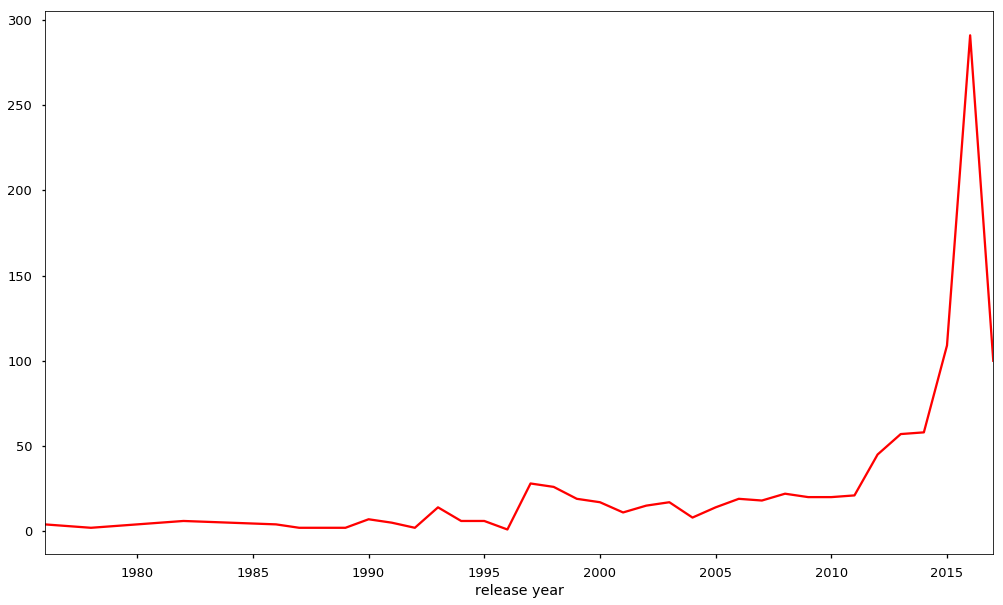

In [123]:
# Plot a simple line graph of number of movies per year
table = movie.groupby('release year').size()
f,ax = plt.subplots(1,1,figsize=(17,10))
table.plot(ax=ax,c='red')

### Above and Beyond
Are the ratings for the top 5 highly user-rated ratings significantly from each other?

I believe this merits extra credit due to the complexity of the code and the value that this information adds to the exploration of the data. By running this analysis, we can conclude _objectively_ that there may/may not be a difference in the user rating scores among the TV-ratings. We can scientifically conclude if, say, a PG-14 movie is higher regarded than a R movie. 

The output is: statistic=4.0444228881697635, pvalue=0.0032246593222714074. The user ratings for the top 5 ratings are statistically different from each other. It is just below a standard alpha threshold of 0.05.

One downside to running statistical analysis on a big dataset is that the p-values are almost meaningless. Beacuse the data contains a large number of samples, it is easy for the p-value to reach significance. With this in mind, it is interesting to see that the p-value is just 0.03. This can signify that although looking overall at the top 5 ratings the differences are different, but it's not by that much.

In [201]:
import scipy.stats as stats

# Check out the different types of ratings
print(movie_filtered["rating"].unique())

# Iterate over the entire dataframe and make a list for each rating
temp_list = []
rating_dict = {}
for i in movie_filtered["rating"].unique():
    filter_var = movie_filtered["rating"]==i
    temp_list.append((movie_filtered[filter_var]["user rating score"].tolist()))

# Toss TV-rating and rating list into a dictionary
counter = 0
for i in movie_filtered["rating"].unique():
    rating_dict[i] = temp_list[counter]
    counter +=1

# Run ANOVA
stats.f_oneway(rating_dict["PG-13"],rating_dict["TV-14"],rating_dict["TV-MA"],rating_dict["R"],rating_dict["TV-PG"])

['PG-13' 'TV-14' 'TV-PG' 'TV-MA' 'NR' 'TV-Y' 'TV-Y7-FV' 'PG' 'R' 'TV-G' 'G'
 'TV-Y7']


F_onewayResult(statistic=4.0444228881697635, pvalue=0.0032246593222714074)